In [3]:
%matplotlib inline

# this step is to set up all prepared libraries and read the file necessrary

import pandas as pd
import pandas as pd
import time as time
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
import sompy as SOM
import barclass as Bar
from pandas.tools.plotting import scatter_matrix
from pandas import Series, DataFrame

file_fri_1 = pd.read_csv('C:/Users/zche2_000/Documents/NICTA project/data/attraction_frequency-2015-12-30/attraction frequency/freqs_Fri.csv')

data_fri_1 = file_fri_1.ix[:99,1:72].values

labour_fri_1 = file_fri_1.ix[:99,:]['id'].values.astype('str')

attr =  file_fri_1.columns.values.astype('str')

msz0 = 30
msz1 = 30

Data = data_fri_1
label = labour_fri_1

In [2]:
file_fri_1.head()

,id,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,81,100,101,102
0,941,7,3,1,3,2,2,1,3,0,...,0,0,0,1,0,0,1,0,1,0
1,2672,4,5,3,1,3,1,4,5,0,...,0,0,0,2,0,0,2,0,1,1
2,4343,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4828,2,1,2,4,2,2,2,2,0,...,1,0,0,0,0,0,1,1,1,0
4,4908,2,1,4,1,0,1,2,0,0,...,0,0,0,1,0,0,1,0,0,0


In [3]:
print 'Data size: ', Data.shape

Data size:  (100L, 70L)


In [4]:
# train the map using batch training of SOM 

reload(sys.modules['sompy'])

t0 = time.time()
sm = SOM.SOM('sm', Data, label,mapsize = [msz0, msz1],norm_method = 'var',initmethod='pca')

sm.init_map()

sm.train(n_job = 1, shared_memory = 'no',verbose='off')

print 'Training is done in: ', time.time()-t0, 'seconds'

Training is done in:  12.6199998856 seconds


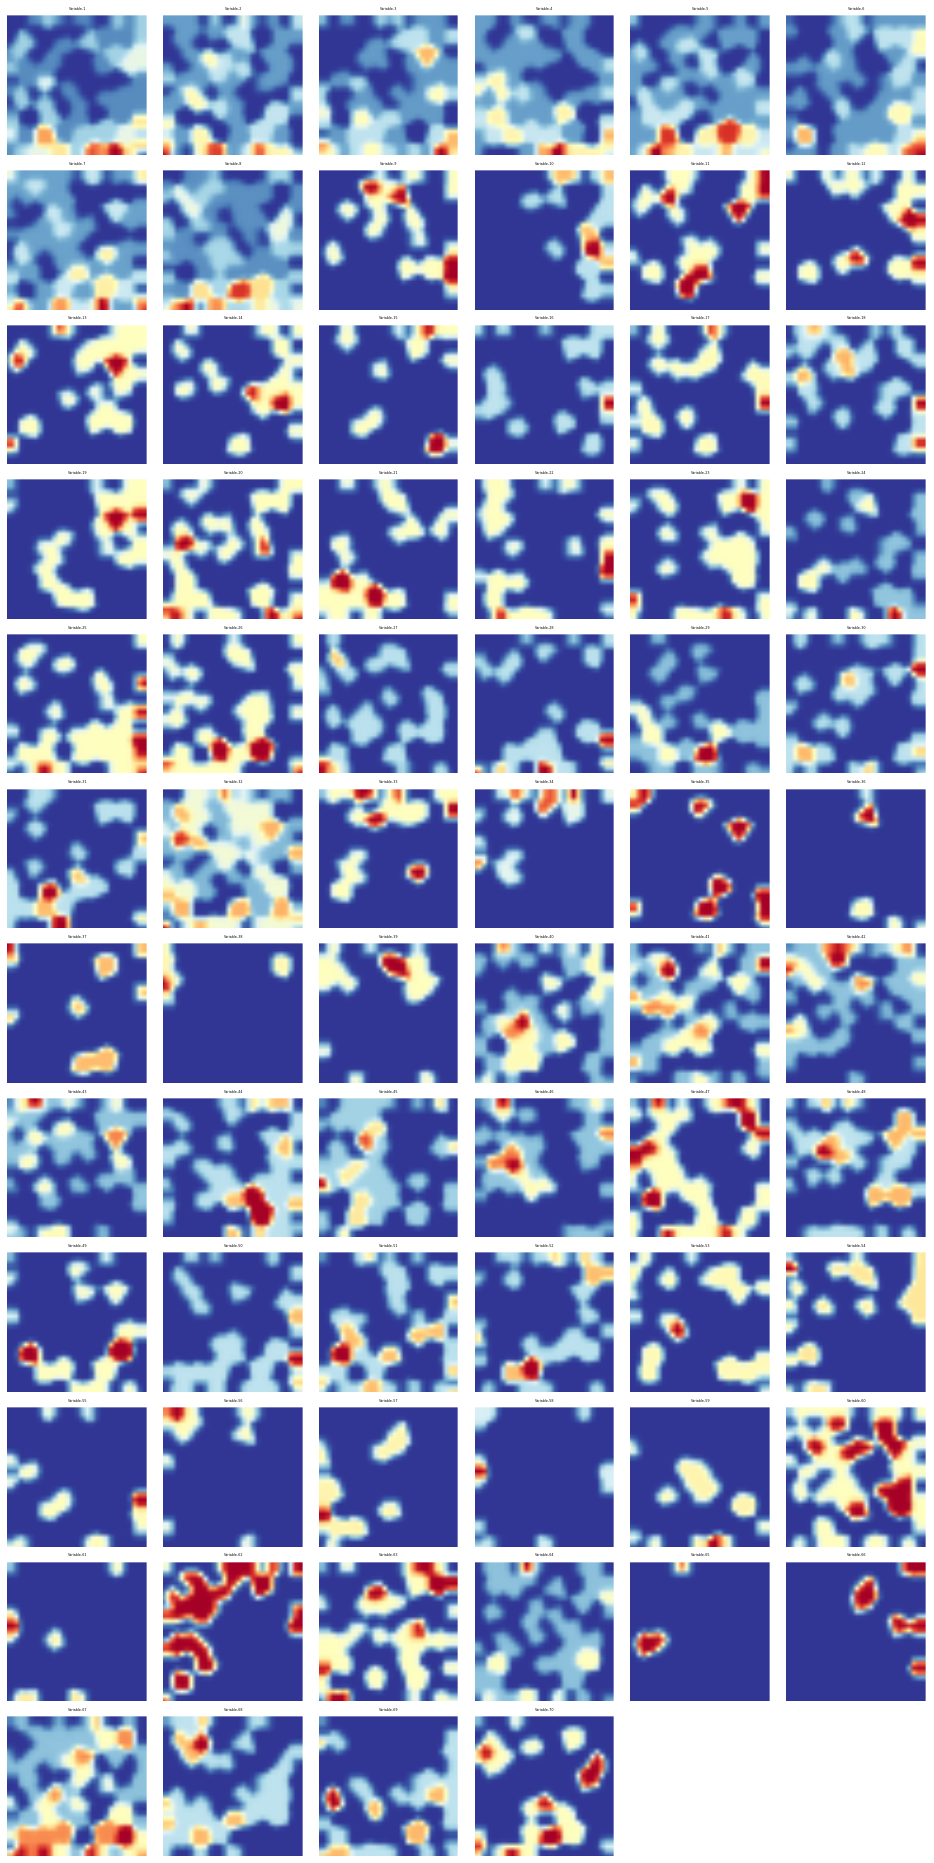

In [5]:
#map with 70 dimensions
a = sm.view_map( what='codebook', which_dim='all',
            pack='Yes', text_size=2.8, save='No',
            save_dir='empty', grid='No', text='Yes', cmap='None', COL_SiZe=6)

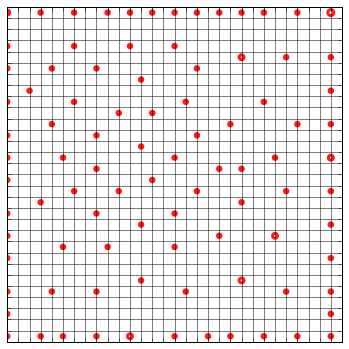

In [6]:
#heat map
b = sm.hit_map()

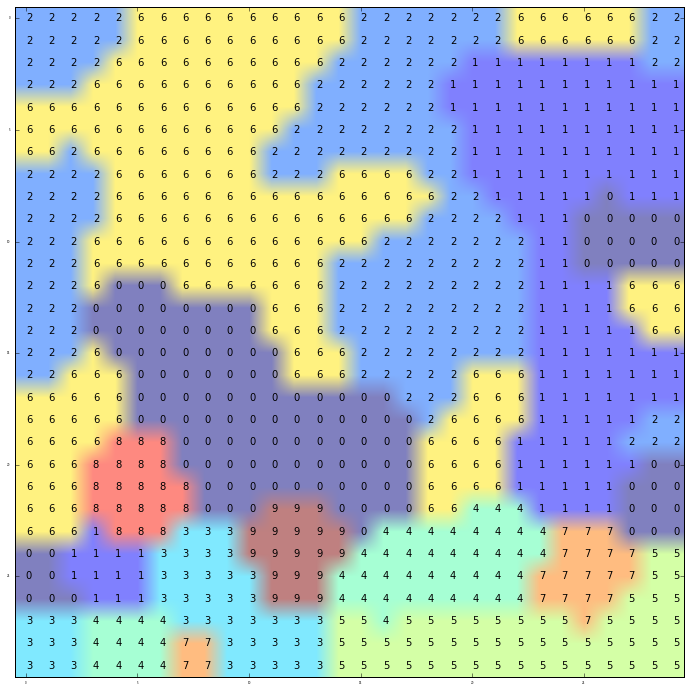

In [7]:
#show k-meams means cluster where k = 10, not really efficent  for the visulisation though
labels = sm.cluster(method='Kmeans', n_clusters=10)
sm.cluster_labels[:10]
c = sm.hit_map_cluster_number()

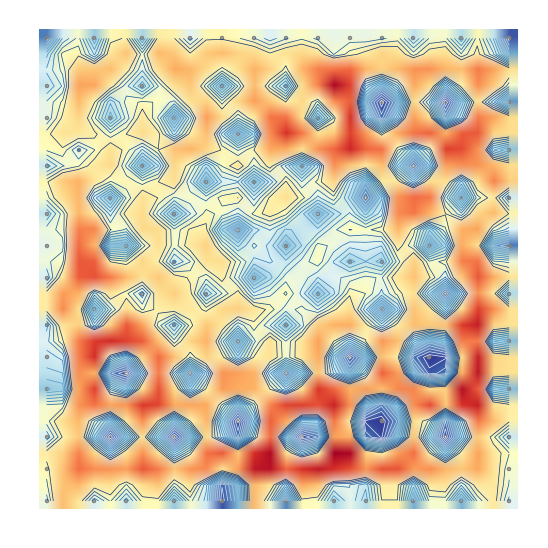

In [8]:
#U-matrix 
d = sm.view_U_matrix(distance2=2, row_normalized='No', show_data='Yes', contooor='Yes', blob='No', save='No', save_dir='')

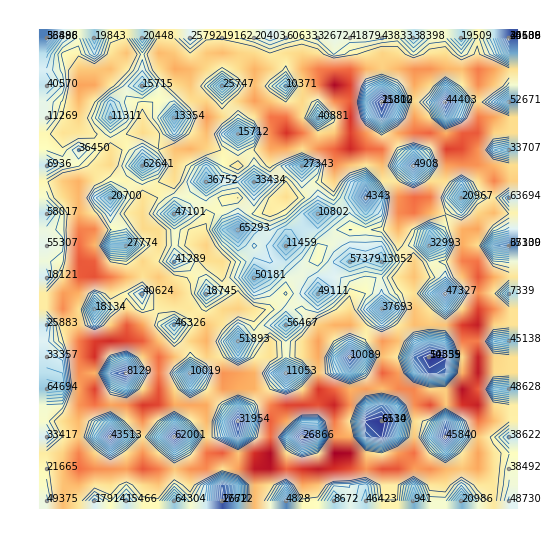

In [9]:
#U-matirx with best match text rendering 
d = sm.view_U_matrix(distance2=2, row_normalized='No', show_data='Yes', contooor='Yes', blob='No', save='No', save_dir='', text_show= 'Yes')

In [4]:
# now try plot the barchart to compare 2 clusters [36752, 33434, 27343] and [65293, 11459, 10802, 4343, 50181]
bc = Bar.barchart(names1 = [36752, 33434, 27343], names2 = [65293, 11459, 10802, 4343, 50181])

barchart set up


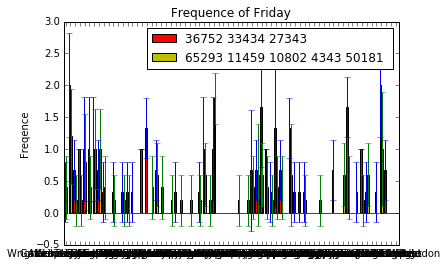

In [5]:
#this shows the difference of mean and varience of 2 gourps of people travel around 70 difference attractions
bc.process()

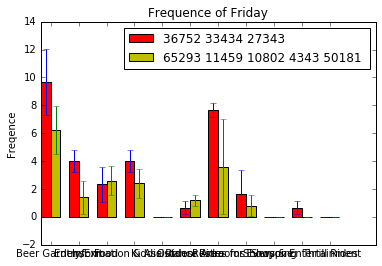

In [7]:
#this chart groups the attraction as 11 different categories more clearly to see the differenc of motivation 
bc.process(grouping  = 'Yes')